# Sentiment Analysis of IMDB Movie Reviews Using ML

    Michael Wang 27797745,Yiqun Du 56443661 Yiqund4, Kaylie Yoshimi Fukumoto 63243336<br>
    project github link: https://github.com/duduyiq2001/movienlp (for some reason pdf was being weird and messed up a lot of our images , you can view the original jupyter notebook version of our report in my github repository)

## our dataset:

The imdb dataset contains a folder for training data set,one for testing as illustrated below: 

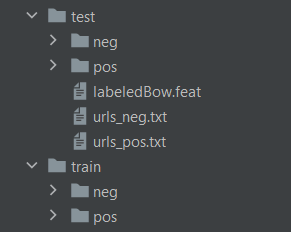

as you can see, within each folder there's a seperate folder for both positive and negative comments(in terms of sentiment towards the movie)

## let's import some libraries!

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

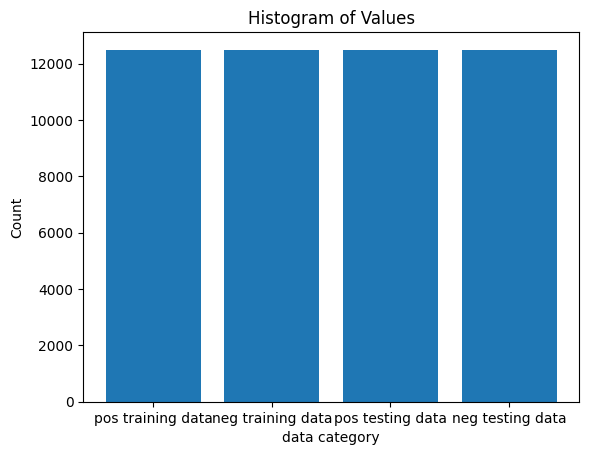

In [ ]:
postrain = len(tf.io.parse_tensor(tf.io.read_file("postensor.txt"),out_type=tf.float32))
negtrain = len(tf.io.parse_tensor(tf.io.read_file("negtensor.txt"),out_type=tf.float32))
postest = len(tf.io.parse_tensor(tf.io.read_file("postensortest.txt"),out_type=tf.float32))
negtest = len(tf.io.parse_tensor(tf.io.read_file("negtensortest.txt"),out_type=tf.float32))
#print(f'{postrain} {negtrain} {postest} {negtest}')
data = {'pos training data': 12489, 'neg training data': 12495, 'pos testing data': 12493, 'neg testing data': 12492}

plt.bar(data.keys(), data.values())

plt.xlabel('data category')
plt.ylabel('Count')
plt.title('Histogram of Values')

# Show plot
plt.show()

as we can see, the testing and traing data is a 50/50 split, with about 25000 data points for each of them

## however the dataset that was given to us only contains text data and the labels were indicated by the name of the folder, we have to do some preprocessing! 

### we prepare the data in two ways:

#### 1.sentence embedding using sentenceTransformer

In [ ]:
#example:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173440e-02 -4.28515337e-02 -1.56286322e-02  1.40537517e-02
  3.95537987e-02  1.21796295e-01  2.94333920e-02 -3.17523740e-02
  3.54959555e-02 -7.93139786e-02  1.75878610e-02 -4.04369794e-02
  4.97259460e-02  2.54912321e-02 -7.18700886e-02  8.14968944e-02
  1.47069409e-03  4.79626991e-02 -4.50336337e-02 -9.92174447e-02
 -2.81769875e-02  6.45046383e-02  4.44670767e-02 -4.76217009e-02
 -3.52952555e-02  4.38671485e-02 -5.28566204e-02  4.33042209e-04
  1.01921491e-01  1.64072458e-02  3.26996557e-02 -3.45986411e-02
  1.21339224e-02  7.94871077e-02  4.58344677e-03  1.57778151e-02
 -9.68206488e-03  2.87625454e-02 -5.05806133e-02 -1.55793708e-02
 -2.87906602e-02 -9.62281041e-03  3.15556638e-02  2.27348786e-02
  8.71449038e-02 -3.85027193e-02 -8.84718448e-02 -8.75499472e-03
 -2.12342981e-02  2.08923500e-02 -9.02077779e-02 -5.25732376e-02
 -1.05638811e-02  2.88310535e-02 -1.61454901e-02  6.17840420e-03
 -1.23234

as we can see, the sentence transformer converts text into an array for positive and negative floating point values, they are all standard scaled so applying standard scaling was not necessary

#### 2. bag of words

we have to import a set of libraries to complete this implementation:

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from pathlib import Path
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import StandardScaler
import re

first we preprocess the text by removing noise, which includes unimportant words, stemming the words!

In [ ]:
def preprocess(text):
    #remove all html tags
    text = re.sub('<.*?>', '', text)
    #remove all non letters
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    #tokenization
    words = nltk.word_tokenize(text)
    #remove all stop words
    words = [w for w in words if w not in stopwords.words('english')]
    #stemming all the words e.g heard -> hear
    words = [PorterStemmer().stem(w) for w in words]
    #convert back to sentence
    text = ' '.join(words)
    return text

here is a little demonstration:

In [ ]:
atext = '''
I basically skimmed through the movie but just enough to 
catch watch the plot was about. To tell you the truth it was kind 
of boring to me and at some spots it didn't make sense. 
The only reason I watched this movie in the first place was 
to see CHACE CRAWFORD!!! He is so hot, but in this movie his 
hair was kind of weird. But still hot.<br /><br />However, despite 
how hot CHACE is, it really did not make up for the film. I guess the 
plot isn't that bad but what really threw me over was the fact that they 
cuss in like every sentence. Is it that hard to express your anger without 
saying the F word every time?The cussing was annoying and the whole flashy, 
camera shaking thing gave me a headache.<br /><br />All in all, although 
the plot was OK, I found the film to be a bore and over dramatic. That's 
why I only cut to scenes with CHACE in it. LOL Anyways, not worth renting 
unless your a die-hard fan of a specific cast member like I was. 
Oh yeah the cast was Hot. The girls were HOT!!! But CHACE IS THE BEST!!
'''

In [ ]:
print(preprocess(atext))

basic skim movi enough catch watch plot tell truth kind bore spot make sens reason watch movi first place see chace crawford hot movi hair kind weird still hot howev despit hot chace realli make film guess plot bad realli threw fact cuss like everi sentenc hard express anger without say f word everi time cuss annoy whole flashi camera shake thing gave headach although plot ok found film bore dramat cut scene chace lol anyway worth rent unless die hard fan specif cast member like oh yeah cast hot girl hot chace best


we then apply this to all the files in the training and testing directory, using pathlib.Path to iterate through all comments files and put them into seperate arrays, skipping the ones that, for some reason, causes unicode decode error

In [ ]:
for p in Path('../aclimdb/test/neg').glob('*.txt'):
    print("counter at " , counter1)
    print(f"{p.name}")
    file1 = open('../aclimdb/test/neg/'+p.name, "r")
    try:
        thecomment = preprocess(file1.readlines()[0])
        negdocuments.append(thecomment)
        #print(negdocuments)
        counter1 += 1
    except UnicodeDecodeError:
        print(f"Error: {p.name} cannot be decoded.")
        counter1 += 1

        file1.close()
for p in Path('../aclimdb/test/pos').glob('*.txt'):
    print("counter at " , counter1)
    print(f"{p.name}")
    file1 = open('../aclimdb/test/pos/'+p.name, "r")
    try:
        thecomment = preprocess(file1.readlines()[0])
        posdocuments.append(thecomment)
        #print(negdocuments)
        counter1 += 1
    except UnicodeDecodeError:
        print(f"Error: {p.name} cannot be decoded.")
        counter1 += 1

        file1.close()


### now we need to count the frequencies of those words!
    we do so by using the countvector class from sklearn:

In [ ]:
vectorizer = CountVectorizer(max_features=500)

vectorizer.fit(negdocuments+posdocuments)
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

we initialize the countervectorizer class by setting the max features to 500 fitting it with both positive and negative training data, which picks out the 500 most frequent words and use their count as feature values. we save the vectorizer object to file so we can use it to vectorize the training data with it. It's important to use the same vectorizer because the training data has to use the same set of features(previously we made the mistake of using two different vectorizers for training and testing data, which resulted in testing error being 15 percent higher than the resulting validation error)

In [ ]:
import pickle 

with open('negdoc.pkl', 'rb') as file1:
    negdocuments = pickle.load(file1)
with open('vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

print("Vocabulary: ", vectorizer.vocabulary_)
vector = vectorizer.transform(negdocuments)
print("Encoded Document is:")
print(vector.toarray()[0:20])
#negtensor = tf.convert_to_tensor(vector.toarray(), dtype=tf.int32)

Vocabulary:  {'stori': 415, 'man': 264, 'feel': 153, 'start': 411, 'open': 306, 'scene': 371, 'exampl': 136, 'comedi': 75, 'audienc': 29, 'turn': 451, 'unfortun': 457, 'stay': 412, 'whole': 477, 'time': 439, 'gener': 172, 'make': 263, 'put': 341, 'even': 129, 'dialogu': 103, 'would': 490, 'seem': 379, 'level': 247, 'better': 42, 'might': 275, 'think': 434, 'good': 181, 'great': 183, 'star': 410, 'seen': 380, 'new': 294, 'jame': 223, 'also': 12, 'daughter': 92, 'son': 402, 'take': 426, 'robert': 363, 'two': 454, 'michael': 274, 'almost': 9, 'hit': 202, 'right': 362, 'short': 389, 'cours': 85, 'problem': 338, 'help': 196, 'run': 365, 'known': 233, 'differ': 105, 'second': 377, 'direct': 106, 'like': 250, 'say': 370, 'sort': 405, 'classic': 72, 'entertain': 124, 'although': 13, 'reason': 351, 'three': 437, 'film': 157, 'far': 149, 'actual': 6, 'one': 305, 'best': 41, 'plot': 327, 'nice': 296, 'see': 378, 'mayb': 269, 'tri': 448, 'origin': 308, 'anoth': 19, 'flick': 162, 'end': 121, 'face'

## training validation test split:

For all neural network models as well as TFDF models, we split the training data into .8 and .2 training and validation split. And since the testing data is the same size as the training data, the eventual split is 4 : 1 : 5.(training 40% validation 10% testing 50%)
For all the scikit models, we only have testing and training data(50% 50%)

## modeling and evaluation: 
we tried many different machine learning algorithms

In [ ]:
from tensorflow.keras.utils import plot_model



## 1. logistic regression

we started with simpler models to create a baseline for measuring performance of more complex models:

#### bag of words:

#### Training:

we started out with max-iteration 60, however it told us it hasn't yet converge and got the resulting training and testing error
:, then we increased it gradually to max-iter = 200. 

Training error rate: 0.14661383285302598 <br>
Validation error rate: 0.15153091855113066

#### evaluation:

testing eror rate: 0.15153091855113066


<Axes: >

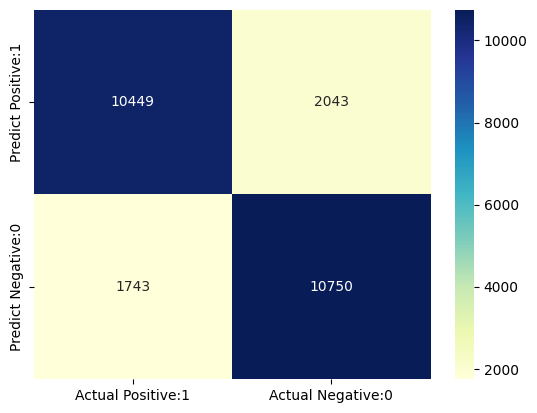

In [ ]:
import joblib
new_model = joblib.load("../model/LoregScikitbow.joblib")
import tensorflow as tf
from sklearn.metrics import zero_one_loss
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
testdata = tf.io.parse_tensor(tf.io.read_file("mixedinputbowtest.txt"),out_type=tf.int32)
testlabel = tf.io.parse_tensor(tf.io.read_file("inputlabelbowtest.txt"),out_type=tf.int32)
#accidentally stored the labels as floats, but it takes too much time to reprepare the data, so we decided to just
##convert them back to integers every time we load the data
testlabel1 = [1 if a == 1 else 0 for a in testlabel]
testlabel1 = tf.convert_to_tensor(testlabel1, dtype=tf.int32)
predict1 = new_model.predict(testdata)
predict1 = [1 if a >=0.5 else 0 for a in predict1]
print("testing eror rate:",zero_one_loss(testlabel1,predict1))
cm = confusion_matrix(testlabel1,predict1 )
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                  index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

as you can see, a simple model like logistic regression achieved very decent result. But note that, it was also trained on 25 percent more data than the following neural networks models, due to the fact that there was no validation data for us to pass into the model during training as we mentioned before. Its high performance can be partially attributed to more training data.

## 2.decision tree

#### bag of words

### Training:

we used the decision tree implementation in sklearn: we tuned two hyperparameters min_sample_leafs and max_depth to achieve the best performance, Both of which are ways to reduce overfitting. We understood that we can achieve that through increasing min_sample_leafs or decreasing maximum depth. We also choose "entropy" as the way to measure information gain within each split 

our best model is when choosing 30 for max_depth and 30 for min_sample_leafs, which achieved <br>
Training error rate: 0.21265609990393852 <br>
Validation error rate: 0.25571342805683406

### evaluation:

testing eror rate: 0.25571342805683406


<Axes: >

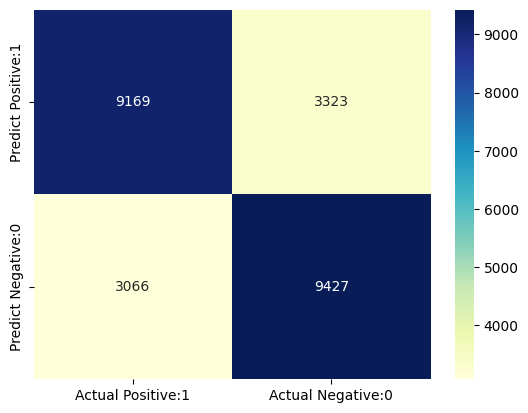

In [ ]:
import joblib
new_model = joblib.load("../model/decisionTreeScikitbow.joblib")
import tensorflow as tf
from sklearn.metrics import zero_one_loss
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
testdata = tf.io.parse_tensor(tf.io.read_file("mixedinputbowtest.txt"),out_type=tf.int32)
testlabel = tf.io.parse_tensor(tf.io.read_file("inputlabelbowtest.txt"),out_type=tf.int32)
#accidentally stored the labels as floats, but it takes too much time to reprepare the data, so we decided to just
##convert them back to integers every time we load the data
testlabel1 = [1 if a == 1 else 0 for a in testlabel]
testlabel1 = tf.convert_to_tensor(testlabel1, dtype=tf.int32)
predict1 = new_model.predict(testdata)
predict1 = [1 if a >=0.5 else 0 for a in predict1]
print("testing eror rate:",zero_one_loss(testlabel1,predict1))
cm = confusion_matrix(testlabel1,predict1 )
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                  index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

This result is perhaps i little bit shocking given that logistic regression performed so much better. with its testing error <br>rate being at least ten percent more.

### 6 layer standard neural network

### training:

For neural networks, We started with a standard 6 layer neural network, Starting with aa dense layer matching the size of the input and gradually decrease the number of nodes in the following layers. We used relu activation function considering its fast computation and popularity. The final layer is a sigmoid function that zaps value between zero and one.  We started with the default learning rate 0.01 but ended up realizing that The model was learning too fast to the point that it passed its optimum within the first epoch, which was a bad sign. Eventually we lowered the learning rate to 100 times less by passing 0.00001 lr into Adam contsructor. We set the max number of epochs to be 30 to make sure the model can reach its optimum, but also passed in an early call back function with a patience of 4 to prevent overfitting

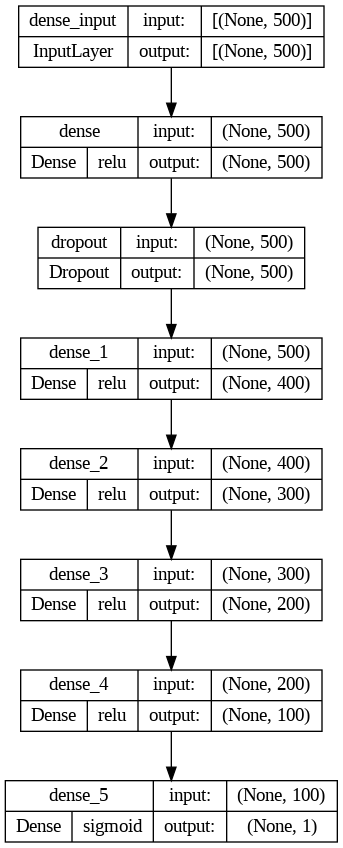

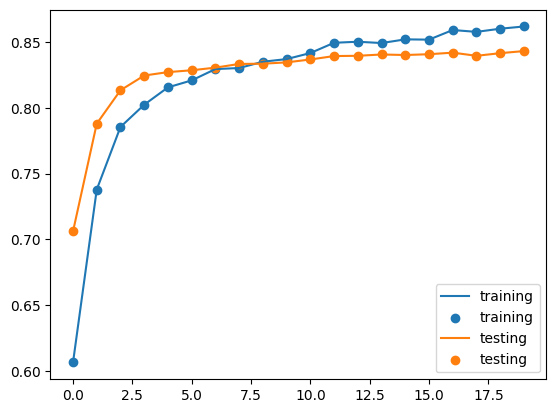

In [ ]:
accuracy = [0.6063, 0.7378, 0.7854, 0.8023, 0.8155, 0.8208, 0.8294, 0.8302, 0.8350, 0.8370, 0.8416, 0.8494, 0.8502, 0.8492, 0.8520, 0.8518, 0.8591, 0.8577, 0.8601, 0.8618]
val_accuracy = [0.7060, 0.7879, 0.8133, 0.8245, 0.8271, 0.8285, 0.8305, 0.8333, 0.8335, 0.8345, 0.8367, 0.8393, 0.8395, 0.8405, 0.8401, 0.8407, 0.8419, 0.8395, 0.8415, 0.8431]
plt.plot([i for i in range(20)], accuracy,label = 'training')
plt.scatter([i for i in range(20)], accuracy,label = 'training')
plt.plot([i for i in range(20)], val_accuracy,label = 'testing')
plt.scatter([i for i in range(20)], val_accuracy,label = 'testing')
plt.legend()



24985
781/781 [==============================] - 1s 1ms/step
testing error 0.15721432859715834


<Axes: >

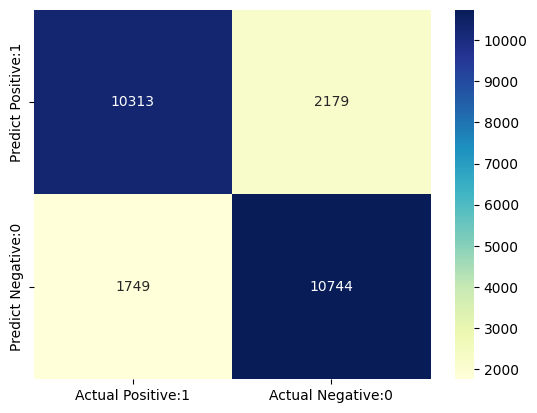

In [ ]:
import tensorflow as tf
from sklearn.metrics import zero_one_loss
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
new_model = tf.keras.models.load_model('../model/NN_longbow')
testdata = tf.io.parse_tensor(tf.io.read_file("mixedinputbowtest.txt"),out_type=tf.int32)
testlabel = tf.io.parse_tensor(tf.io.read_file("inputlabelbowtest.txt"),out_type=tf.int32)
testlabel1 = [1 if a == 1 else 0 for a in testlabel]
print(len(testlabel1))
testlabel1 = tf.convert_to_tensor(testlabel1, dtype=tf.int32)
predict1 = new_model.predict(testdata)
predict1 = [1 if a >=0.5 else 0 for a in predict1]
print("testing error",zero_one_loss(testlabel1,predict1))
cm = confusion_matrix(testlabel1,predict1 )
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                  index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

This model achieved about the same testing error rate as Logistic Regression, which means it's at least as well as our baseline model, considering that it's using 20 percent less data to train. The following are our attempt to improve the model by redesigning its structure.

### 6 layer resnet

### training

Long neural networks (with a lot of layers) often run into this issue of vanishing gradient/gradient explosion problem where due to the nature of having to apply chain rule during back propagation, the gradients at the in the layers on the left tend to get close to zero(or sometimes explode), which leads to the information getting lost in the neural network. Thus sometimes when we increase the number of layers, the training/testing errors also increase! Therefore, our group decided to attempt a residual network with also 6 layers, with the same number of neurons in each layer as our last model, so that we can make a fair comparison to see whether if the residual network actually provides am improvement. We also chose to use concatenation instead of addition to combine input and output of residual blocks because there's 500 features from the input layer originally. In order to do addition, we would have to be forced to have the same number neurons in each output layer of the residual block, thus increasing the number of nuerons and potentially lead to more overfitting.   

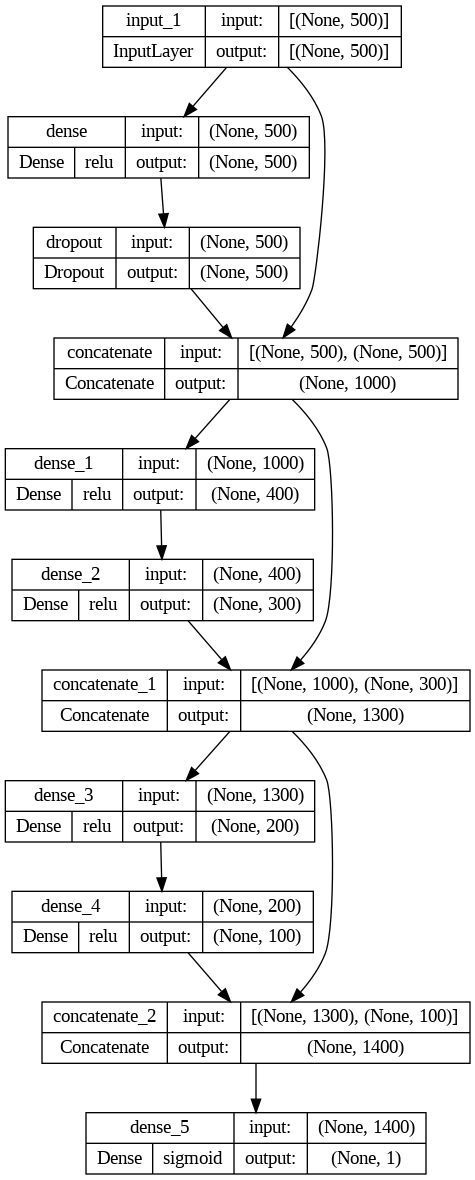

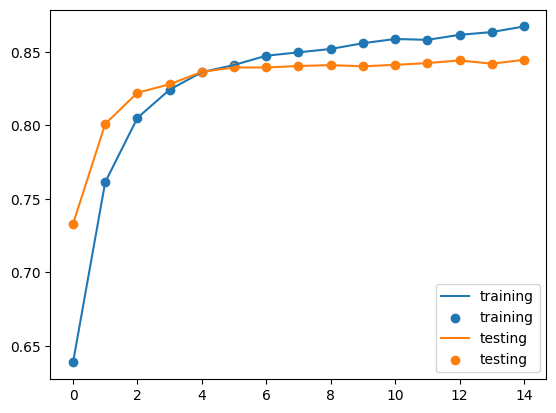

In [ ]:
accuracy = [0.6386, 0.7613, 0.8050, 0.8242, 0.8361, 0.8410, 0.8473, 0.8496, 0.8519, 0.8558, 0.8587, 0.8581, 0.8615, 0.8634, 0.8672]
val_accuracy = [0.7328, 0.8009, 0.8221, 0.8279, 0.8363, 0.8393, 0.8393, 0.8403, 0.8409, 0.8401, 0.8411, 0.8423, 0.8441, 0.8419, 0.8445]
plt.plot([i for i in range(15)], accuracy,label = 'training')
plt.scatter([i for i in range(15)], accuracy,label = 'training')
plt.plot([i for i in range(15)], val_accuracy,label = 'testing')
plt.scatter([i for i in range(15)], val_accuracy,label = 'testing')
plt.legend()

24985
781/781 [==============================] - 1s 2ms/step
testing error 0.15353211927156296


<Axes: >

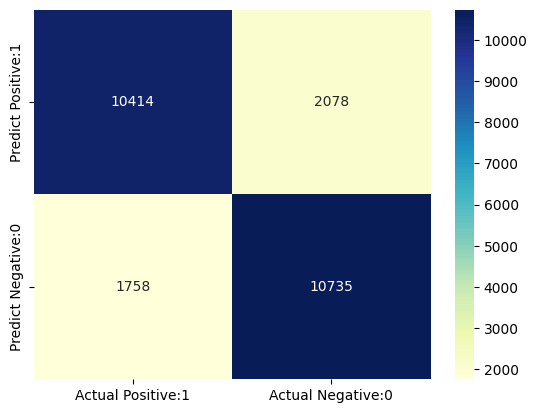

In [ ]:
import tensorflow as tf
from sklearn.metrics import zero_one_loss
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
new_model = tf.keras.models.load_model('../code/NN_longresnetwwithtworesblocksBOW')
testdata = tf.io.parse_tensor(tf.io.read_file("mixedinputbowtest.txt"),out_type=tf.int32)
testlabel = tf.io.parse_tensor(tf.io.read_file("inputlabelbowtest.txt"),out_type=tf.int32)
testlabel1 = [1 if a == 1 else 0 for a in testlabel]
print(len(testlabel1))
testlabel1 = tf.convert_to_tensor(testlabel1, dtype=tf.int32)
predict1 = new_model.predict(testdata)
predict1 = [1 if a >=0.5 else 0 for a in predict1]
print("testing error",zero_one_loss(testlabel1,predict1))
cm = confusion_matrix(testlabel1,predict1 )
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                  index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Although this model does have slightly less testing error and does seem to learn the pattern a bit faster as its validation accuracy quickly, but it was not a huge improvement. 

## A shorter 3 layer network

after attempting two different deeper neural networks, we decided attempt a shorter network with three layers, since shorter network should generalize better with small amount of data.

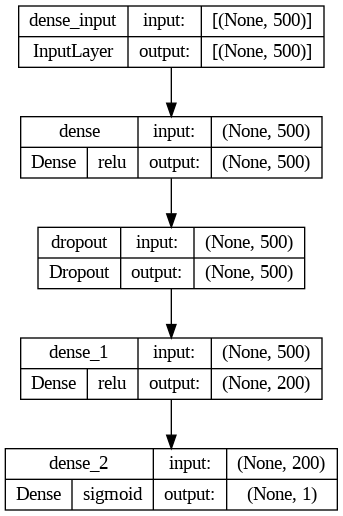

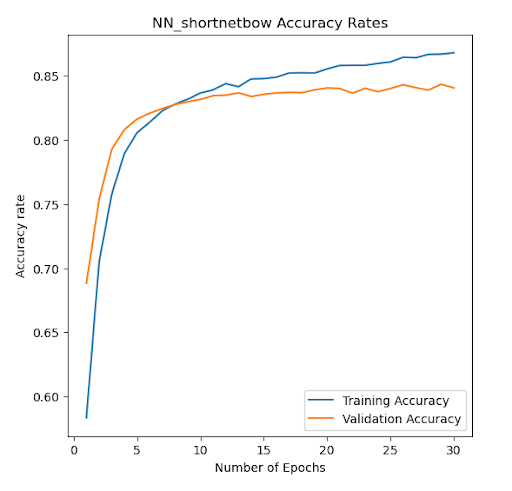

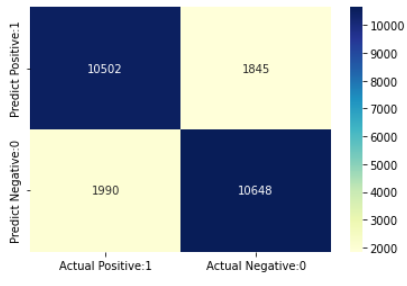

Testing error: 0.15349209525715424

Surprising, no much difference was made when we reduce the number of layers, the validation error was increasing gradually until started to just fluctuating since epoch 20.The reason we let it fluctunate is perhaps that we set a very high patience number for early stopping. Another interesting aspect is that, unlike previous model which had more FPR than FNR, this one is more balanced and had slightly more FNR. 

### network without dropout layer

In all previous models, we added a dropout layer with dropout rate 0.2 to reduce overfitting and the complexity of the model. So we wanted to make a network without one for comparison. This model is exactly the same as the first neural network model except we threw out that drop out layer

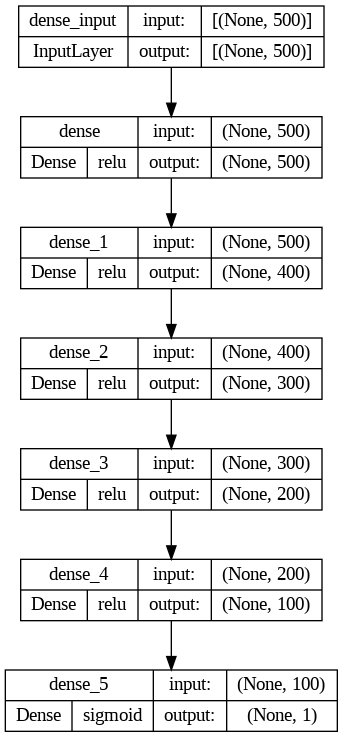

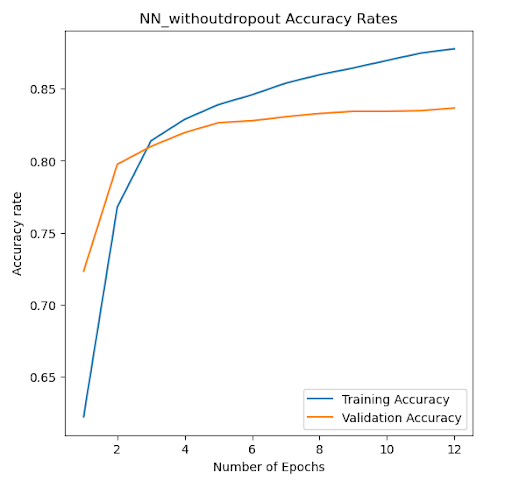

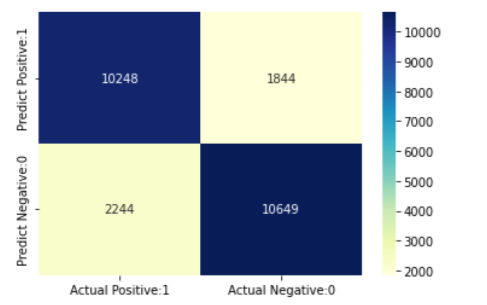

testing error:0.1636181709025415

So the result did confirm our hypothesis, which is the dropout layer did help with overfitting as this model was overfitting a lot more than the previous ones. Moreover, this model also had more FNR than FPR, but a lot more.

# Experimenting with Ensembles

### gradient boosted decision tree

we were interested in ensembles with decision trees, specifically gradient boosted decision trees and  random forests because they are very different techniques. GBDT often produces more accurate results given that it's trained on the errors of the previous trees, but it takes more time to train because it's trained sequentially. whereas random forests are trained parallelly. Another benefit of using GDBT is that it gives us insights for feature importance, which is very relevant in the context of bag of words

### Training

In [ ]:
Train_Accuracies: [0.529594, 0.710112, 0.728473, 0.735328, 0.742032, 0.743934, 0.740731, 0.742483, 0.744984, 0.750938, 0.752439, 0.755891, 0.765548, 0.773353, 0.775654, 0.780107, 0.783609, 0.787412, 0.789863, 0.794066, 0.797168, 0.80037, 0.804073, 0.806824, 0.809776, 0.812278, 0.81558, 0.819233, 0.821934, 0.823936, 0.826737, 0.828489, 0.831841, 0.833692, 0.835943, 0.837895, 0.839796, 0.841047, 0.842898, 0.845299, 0.847751, 0.849402, 0.851203, 0.853355, 0.854505, 0.855506, 0.856807, 0.858258, 0.859359, 0.860659, 0.86181, 0.863061, 0.864562, 0.866463, 0.867364, 0.868565, 0.870016, 0.871567, 0.872367, 0.873918, 0.875219, 0.87627, 0.87697, 0.878671, 0.879572, 0.880622, 0.881223, 0.882524, 0.884075, 0.884475, 0.885426, 0.886376, 0.886977, 0.887877, 0.888578, 0.889778, 0.890029, 0.890979, 0.89158, 0.89238, 0.893431, 0.893681, 0.895032, 0.896082, 0.896933, 0.897533, 0.898684, 0.898984, 0.899735, 0.900986, 0.901686, 0.901936, 0.902937, 0.903637, 0.904188, 0.904638, 0.905188, 0.905889, 0.906489, 0.90709, 0.90779, 0.90799, 0.909041, 0.909641, 0.910492]
Validation_Accuracies: [0.505303, 0.690814, 0.712027, 0.71743, 0.726236, 0.727436, 0.725435, 0.726836, 0.731439, 0.738043, 0.738643, 0.738643, 0.745848, 0.756254, 0.759256, 0.762457, 0.764058, 0.764659, 0.76726, 0.770262, 0.771663, 0.773464, 0.775665, 0.777266, 0.779067, 0.779868, 0.781669, 0.784471, 0.787272, 0.789073, 0.789674, 0.790875, 0.791875, 0.792475, 0.792275, 0.795677, 0.796878, 0.797478, 0.798879, 0.799079, 0.79968, 0.80008, 0.801081, 0.801681, 0.803482, 0.804283, 0.804883, 0.805283, 0.805884, 0.807885, 0.808285, 0.808285, 0.809886, 0.811287, 0.811287, 0.811887, 0.813088, 0.813888, 0.812888, 0.814088, 0.815289, 0.81609, 0.81609, 0.81709, 0.817491, 0.818491, 0.818691, 0.819292, 0.819692, 0.819492, 0.820092, 0.820092, 0.820893, 0.820092, 0.820292, 0.820492, 0.821293, 0.821693, 0.822293, 0.821893, 0.821893, 0.822694, 0.822694, 0.823494, 0.823494, 0.824295, 0.825295, 0.824895, 0.824695, 0.826296, 0.826696, 0.827296, 0.827697, 0.827897, 0.827496, 0.828097, 0.828297, 0.829298, 0.830098, 0.829898, 0.830298, 0.829298, 0.830098, 0.829698, 0.830698]
iter_array: [1, 2, 3, 4, 5, 6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156, 166, 176, 186, 196, 206, 216, 226, 236, 246, 256, 266, 276, 286, 296, 306, 316, 326, 336, 346, 356, 366, 376, 386, 396, 406, 416, 426, 436, 446, 456, 466, 476, 486, 496, 506, 516, 526, 536, 546, 556, 566, 576, 586, 596, 606, 616, 626, 636, 646, 656, 666, 676, 686, 696, 706, 716, 726, 736, 746, 756, 766, 776, 786, 796, 806, 816, 826, 836, 846, 856, 866, 876, 886, 896, 906, 916, 926, 936, 946, 956, 966, 976, 986, 996]

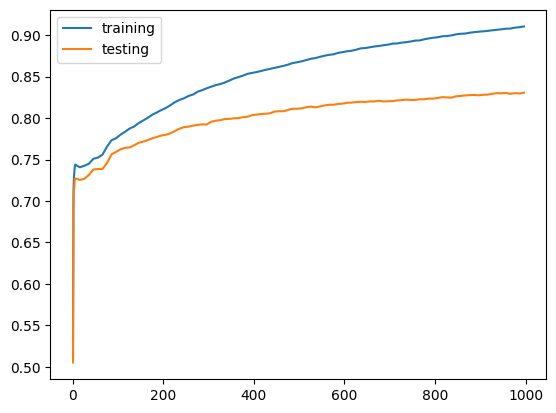

In [ ]:
Train_Accuracies = [0.529594, 0.710112, 0.728473, 0.735328, 0.742032, 0.743934, 0.740731, 0.742483, 0.744984, 0.750938, 0.752439, 0.755891, 0.765548, 0.773353, 0.775654, 0.780107, 0.783609, 0.787412, 0.789863, 0.794066, 0.797168, 0.80037, 0.804073, 0.806824, 0.809776, 0.812278, 0.81558, 0.819233, 0.821934, 0.823936, 0.826737, 0.828489, 0.831841, 0.833692, 0.835943, 0.837895, 0.839796, 0.841047, 0.842898, 0.845299, 0.847751, 0.849402, 0.851203, 0.853355, 0.854505, 0.855506, 0.856807, 0.858258, 0.859359, 0.860659, 0.86181, 0.863061, 0.864562, 0.866463, 0.867364, 0.868565, 0.870016, 0.871567, 0.872367, 0.873918, 0.875219, 0.87627, 0.87697, 0.878671, 0.879572, 0.880622, 0.881223, 0.882524, 0.884075, 0.884475, 0.885426, 0.886376, 0.886977, 0.887877, 0.888578, 0.889778, 0.890029, 0.890979, 0.89158, 0.89238, 0.893431, 0.893681, 0.895032, 0.896082, 0.896933, 0.897533, 0.898684, 0.898984, 0.899735, 0.900986, 0.901686, 0.901936, 0.902937, 0.903637, 0.904188, 0.904638, 0.905188, 0.905889, 0.906489, 0.90709, 0.90779, 0.90799, 0.909041, 0.909641, 0.910492]
Validation_Accuracies = [0.505303, 0.690814, 0.712027, 0.71743, 0.726236, 0.727436, 0.725435, 0.726836, 0.731439, 0.738043, 0.738643, 0.738643, 0.745848, 0.756254, 0.759256, 0.762457, 0.764058, 0.764659, 0.76726, 0.770262, 0.771663, 0.773464, 0.775665, 0.777266, 0.779067, 0.779868, 0.781669, 0.784471, 0.787272, 0.789073, 0.789674, 0.790875, 0.791875, 0.792475, 0.792275, 0.795677, 0.796878, 0.797478, 0.798879, 0.799079, 0.79968, 0.80008, 0.801081, 0.801681, 0.803482, 0.804283, 0.804883, 0.805283, 0.805884, 0.807885, 0.808285, 0.808285, 0.809886, 0.811287, 0.811287, 0.811887, 0.813088, 0.813888, 0.812888, 0.814088, 0.815289, 0.81609, 0.81609, 0.81709, 0.817491, 0.818491, 0.818691, 0.819292, 0.819692, 0.819492, 0.820092, 0.820092, 0.820893, 0.820092, 0.820292, 0.820492, 0.821293, 0.821693, 0.822293, 0.821893, 0.821893, 0.822694, 0.822694, 0.823494, 0.823494, 0.824295, 0.825295, 0.824895, 0.824695, 0.826296, 0.826696, 0.827296, 0.827697, 0.827897, 0.827496, 0.828097, 0.828297, 0.829298, 0.830098, 0.829898, 0.830298, 0.829298, 0.830098, 0.829698, 0.830698]
iter_array = [1, 2, 3, 4, 5, 6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156, 166, 176, 186, 196, 206, 216, 226, 236, 246, 256, 266, 276, 286, 296, 306, 316, 326, 336, 346, 356, 366, 376, 386, 396, 406, 416, 426, 436, 446, 456, 466, 476, 486, 496, 506, 516, 526, 536, 546, 556, 566, 576, 586, 596, 606, 616, 626, 636, 646, 656, 666, 676, 686, 696, 706, 716, 726, 736, 746, 756, 766, 776, 786, 796, 806, 816, 826, 836, 846, 856, 866, 876, 886, 896, 906, 916, 926, 936, 946, 956, 966, 976, 986, 996]
plt.plot(iter_array, Train_Accuracies,label = 'training')
#plt.scatter(iter_array, Train_Accuracies,label = 'training')
plt.plot(iter_array , Validation_Accuracies,label = 'testing')
#plt.scatter(iter_array, Validation_Accuracies,label = 'testing')
plt.legend()

There was a lot of overfitting during our first training. Perhaps lower both subsample rate and subsample feature rate since there is a duge gap in between training and testing error

24985
781/781 [==============================] - 7s 5ms/step

Testing error: 0.17102261356814086

### sub_sample_rate= 0.1 sub_sample_feature_0.1

In [ ]:
Train_Accuracies =[0.605744, 0.669385, 0.6925, 0.716466, 0.730925, 0.761195, 0.765898, 0.76865, 0.770851, 0.775854, 0.778456, 0.780357, 0.78486, 0.786561, 0.788062, 0.790514, 0.792665, 0.795967, 0.797919, 0.80002, 0.801921, 0.804173, 0.805924, 0.806824, 0.807575, 0.809826, 0.812978, 0.814529, 0.816431, 0.818182, 0.819333, 0.822435, 0.823585, 0.825837, 0.826937, 0.828238, 0.828839, 0.83029, 0.83104, 0.833192, 0.834042, 0.835393, 0.836644, 0.838895, 0.840146, 0.841297, 0.842197, 0.842948, 0.844599, 0.8456, 0.8462, 0.847751, 0.848001, 0.849552, 0.849852, 0.851003, 0.851403, 0.851654, 0.852704, 0.853605, 0.854956, 0.855156, 0.855556, 0.856407, 0.857207, 0.858058, 0.858708, 0.859609, 0.859509, 0.86086, 0.86111, 0.86166, 0.86216, 0.862661, 0.863161, 0.863461, 0.864162, 0.864562, 0.864962, 0.865663, 0.865663, 0.866663, 0.867564, 0.867014, 0.867914, 0.868264, 0.868615, 0.869615, 0.870616, 0.871066, 0.871316, 0.871617, 0.871516, 0.872217, 0.871767, 0.871617, 0.872417, 0.873268, 0.873868, 0.873818, 0.874268, 0.874869, 0.875119, 0.875219]
Validation_Accuracies = [0.590554, 0.646188, 0.673804, 0.695017, 0.715629, 0.752852, 0.759256, 0.756654, 0.759055, 0.763258, 0.76666, 0.768461, 0.770262, 0.773864, 0.775265, 0.775265, 0.778267, 0.780869, 0.782269, 0.78407, 0.786072, 0.789073, 0.789073, 0.790074, 0.791475, 0.793276, 0.794277, 0.796078, 0.798879, 0.799079, 0.80048, 0.802481, 0.804683, 0.805884, 0.806484, 0.806284, 0.807084, 0.808885, 0.809085, 0.810086, 0.811087, 0.812287, 0.814088, 0.814889, 0.814889, 0.81709, 0.817491, 0.817491, 0.818891, 0.818291, 0.819892, 0.821293, 0.822293, 0.822293, 0.822894, 0.823294, 0.823694, 0.824895, 0.824695, 0.824495, 0.824695, 0.825695, 0.825495, 0.824695, 0.825095, 0.825695, 0.824895, 0.825695, 0.826496, 0.825295, 0.828297, 0.827697, 0.829498, 0.829898, 0.829698, 0.831699, 0.830899, 0.832299, 0.831299, 0.831099, 0.831499, 0.831099, 0.831699, 0.831099, 0.8327, 0.8325, 0.8325, 0.832299, 0.8331, 0.8331, 0.8331, 0.8331, 0.8331, 0.834501, 0.8337, 0.8341, 0.8341, 0.834701, 0.8341, 0.834301, 0.834901, 0.835501, 0.835501, 0.836102]
iter_array = [2, 3, 4, 5, 6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156, 166, 176, 186, 196, 206, 216, 226, 236, 246, 256, 266, 276, 286, 296, 306, 316, 326, 336, 346, 356, 366, 376, 386, 396, 406, 416, 426, 436, 446, 456, 466, 476, 486, 496, 506, 516, 526, 536, 546, 556, 566, 576, 586, 596, 606, 616, 626, 636, 646, 656, 666, 676, 686, 696, 706, 716, 726, 736, 746, 756, 766, 776, 786, 796, 806, 816, 826, 836, 846, 856, 866, 876, 886, 896, 906, 916, 926, 936, 946, 956, 966, 976, 986, 996]


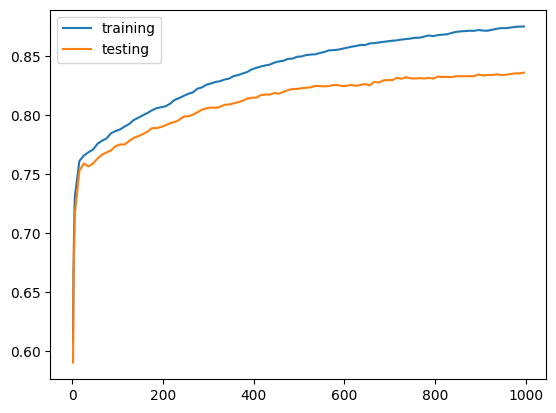

In [ ]:
plt.plot(iter_array, Train_Accuracies,label = 'training')
#plt.scatter(iter_array, Train_Accuracies,label = 'training')
plt.plot(iter_array , Validation_Accuracies,label = 'testing')
#plt.scatter(iter_array, Validation_Accuracies,label = 'testing')
plt.legend()

781/781 [==============================] - 5s 4ms/step

Testing error: 0.16365819491695022


Variable Importance: INV_MEAN_MIN_DEPTH:
    1.  "data:0.33"  0.151188 ################ <br>
    2. "data:0.183"  0.150230 ############## <br>
    3. "data:0.488"  0.149688 ############# <br>
    4. "data:0.258"  0.147998 ########## <br>
    5. "data:0.471"  0.147788 ########## <br>
    6.  "data:0.41"  0.147618 ######### <br>
    7.  "data:0.30"  0.147439 ######### <br>
    8. "data:0.137"  0.147316 ######### <br>
    9. "data:0.298"  0.147084 ######### <br>
   10.  "data:0.49"  0.146659 ######## <br>
   11. "data:0.122"  0.146195 ####### <br>
   12. "data:0.317"  0.146102 ####### <br>
   13. "data:0.108"  0.146058 ####### <br>
   14.  "data:0.36"  0.145992 ####### <br>
   15. "data:0.474"  0.145942 ####### <br>
   16. "data:0.330"  0.145678 ###### <br>
   17. "data:0.151"  0.145578 ###### <br>
   18.  "data:0.12"  0.145491 ###### <br>
   19. "data:0.423"  0.145343 ###### <br>
   20. "data:0.430"  0.145305 ###### <br>
   21. "data:0.318"  0.145106 ##### <br>
   22. "data:0.145"  0.145102 ##### <br>
   23. "data:0.327"  0.145101 ##### <br>
   24. "data:0.419"  0.144982 ##### <br>
   25. "data:0.277"  0.144914 ##### <br>
   26. "data:0.457"  0.144870 ##### <br>
   27. "data:0.487"  0.144869 ##### <br>
   28.  "data:0.15"  0.144797 ##### <br>
   29. "data:0.129"  0.144740 ##### <br>
   30. "data:0.379"  0.144726 ##### <br>
   31. "data:0.283"  0.144709 ##### <br>
   32. "data:0.375"  0.144659 #### <br>
   33.  "data:0.18"  0.144642 #### <br>
   34. "data:0.248"  0.144623 #### <br>
   35. "data:0.413"  0.144570 #### <br>
   36. "data:0.303"  0.144544 #### <br>
   37. "data:0.181"  0.144532 #### <br>
   38. "data:0.206"  0.144409 #### <br>
   39. "data:0.220"  0.144287 #### <br>
   40.  "data:0.99"  0.144193 #### <br>
   41. "data:0.168"  0.144057 ### <br>
   42. "data:0.361"  0.143968 ### <br>
   43.  "data:0.28"  0.143954 ### <br>
   44. "data:0.368"  0.143949 ### <br>
   45. "data:0.157"  0.143909 ### <br>
   46.  "data:0.82"  0.143837 ### <br>
   47. "data:0.234"  0.143836 ### <br>
   48.   "data:0.2"  0.143769 ### <br>
   49. "data:0.199"  0.143727 ### <br>
   50.  "data:0.14"  0.143711 ### <br>
The output of the model contains information about feature importance, here are the 50 most important features based on mean minimum depth, which is the average of the minimum depth the feature is split on. we then reload the stored vectorizer object to find out what these feature refers to:
mostimportant = 
['got', 'involv', 'joke', 'danc', 'god', 'appar', 'horror', 'problem', 'critic', 'budget', 'star', 'quit', 'stay', 'still', 'return', 'rate', 'far', 'think', 'big', 'book', 'hilari', 'sort', 'later', 'guy', 'simpli', 'absolut', 'citi', 'three', 'take', 'dream', 'goe', 'saw', 'much', 'excel', 'obvious', 'less', 'thought', 'expect', 'old', 'town', 'made', 'written', 'speak', 'seri', 'see', 'truli', 'well', 'credit', 'includ', 'known']

It turns out these are the most important features based on the mean-min-depth, some of which are surprsing, some of which are not. 'Got' turned out to be the most important word even though it seems like a neural word. But at the same time it might be a stem of some other words since we applied stemming in the preprocessing step. It does make sense that words like hilari and unfortun are in it. However, since our model does not take context into consideration, unfortunate can be a neural word because it can mean that something unfortunate happens in the plot of the movie or it can be used as a transitional word like "unfortunately, the acting is terrible"
There are also other metrics for feature importance such as total number of nodes in the model that we can use to infer most important features, which has greater variance than this one and probably a better indicator. But due to time constraint, we are only showing one.

## random forests

we attempted to use the random forest decision tree implementation in the tensorflow decision tree module, but unfortunately it just does not work as well as other models with its final accurarcy being slightly below 80 percent. We decide to not even discuss about it because the implementation is a little confusing to use as it only provides "accuracy"in the buildlog, without telling us whether if it's training accuracy or validation accuracy, while We did passed the validation data into the model just like other models. Therefore, the implementation either does not have the mechanism for validation to be passed into, or that 80 percent refers to either training accuracy or validation accuracy or both of them conbined. Either way, we think that this model did not provide us enough details about model's training process and we gave up because there was no way for us to tune the model.

the buildlog during training process:
trees: 1, Out-of-bag evaluation: accuracy:0.687763 logloss:11.2542 <br>
	trees: 11, Out-of-bag evaluation: accuracy:0.740156 logloss:2.09033 <br>
	trees: 21, Out-of-bag evaluation: accuracy:0.765097 logloss:0.925065 <br>
	trees: 31, Out-of-bag evaluation: accuracy:0.773653 logloss:0.663827 <br>
	trees: 41, Out-of-bag evaluation: accuracy:0.779907 logloss:0.596981 <br>
	trees: 51, Out-of-bag evaluation: accuracy:0.781158 logloss:0.538951 <br>
	trees: 61, Out-of-bag evaluation: accuracy:0.782659 logloss:0.521063 <br>
	trees: 71, Out-of-bag evaluation: accuracy:0.78411 logloss:0.506725 <br>
	trees: 81, Out-of-bag evaluation: accuracy:0.78461 logloss:0.501798 <br>
	trees: 91, Out-of-bag evaluation: accuracy:0.787862 logloss:0.493345 <br>
	trees: 101, Out-of-bag evaluation: accuracy:0.789813 logloss:0.492231 <br>
	trees: 111, Out-of-bag evaluation: accuracy:0.791164 logloss:0.486369 <br>
	trees: 121, Out-of-bag evaluation: accuracy:0.791064 logloss:0.486536 <br>

# sentence embedding models

### 1. NNmodel

#### Model diagram

For sentence embedding, we decided to also start with 6 layers(discounting dropout and input), with first layer doing expansion from 384 nodes to 500, and then gradually decrease.

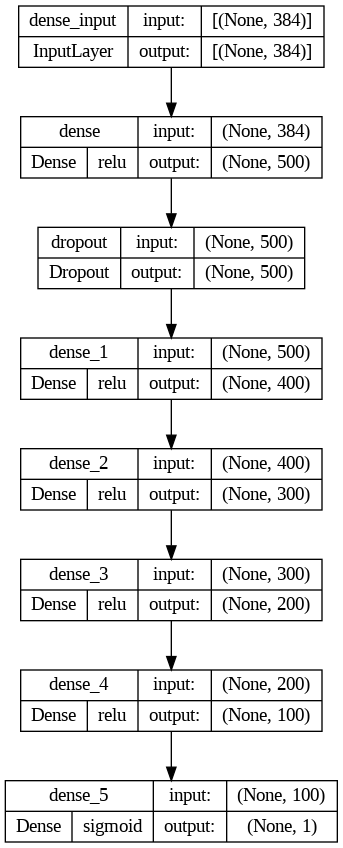

#### Training/validation data graph

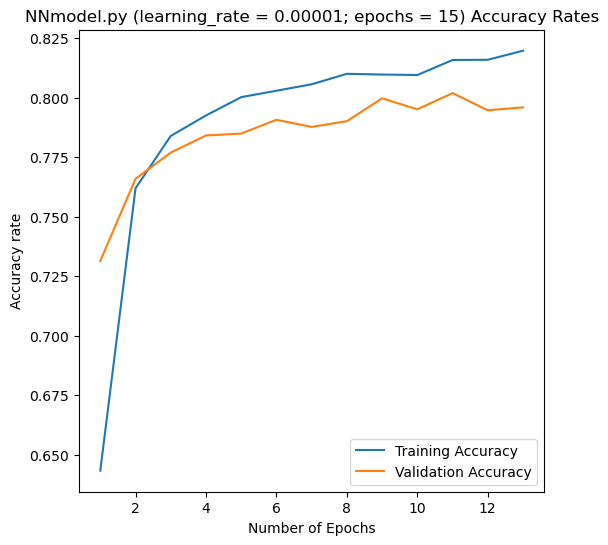

#### Confusion matrix


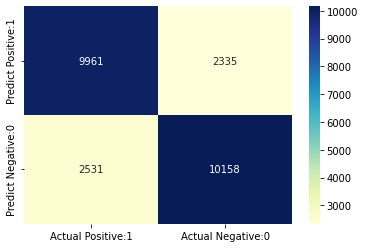

testing error: 0.2006

#### How model performed

Although we expected deep learning models to work better with sentence embedding, this one did not. To put things into perspective , this one performed about 5 percent worse than our bag of words neural models on average.

To create some baselines for comparison, we also experimented with logistic regression and decsion trees, and here are the results:

 <span style = "color: blue;">======================================================================== <span>
decision_tree_scikit.py<br>

max_depth = 7,  min_samples_leaf= 170 <br>
    Training error rate: 0.29823086775536345 <br>
    Validation error rate: 0.32715629377626576 <br>

max_depth = 30, min_samples_leaf = 30 <br>
    Training error rate: 0.19672590457893047 <br>
    Validation error rate: 0.3520112067240344 <br>

  <span style = "color: red;">==================================================<span>
log_reg_scikit.py <br>
Testing error rate: 0.17971501761127118 <br>

Again, Note that we are using 20 percent more data to train those two models. for some reason, sentence embedding does not work well with out decision tree. We tried adjusting max_depth and mim_sample_leafs to achieve a good balance between training error and vlidation error, the decision just does not seem to be able to learn the data well. In contrast, logistic regression works a lot better with sentence embedding and even achieved better results than deep learning model.

### 2. 6 layer res net


#### Model diagram

For the same reason as what happened with our bag of words models, we decided to train a resnet in comparison to a standard neural network with the same number of layers. Since we only have 384 features in this case, we decided to combine residual block input and residual block ouputs with addition, which puts a constraint that every output of each residual block also have to be 384 nuerons. 

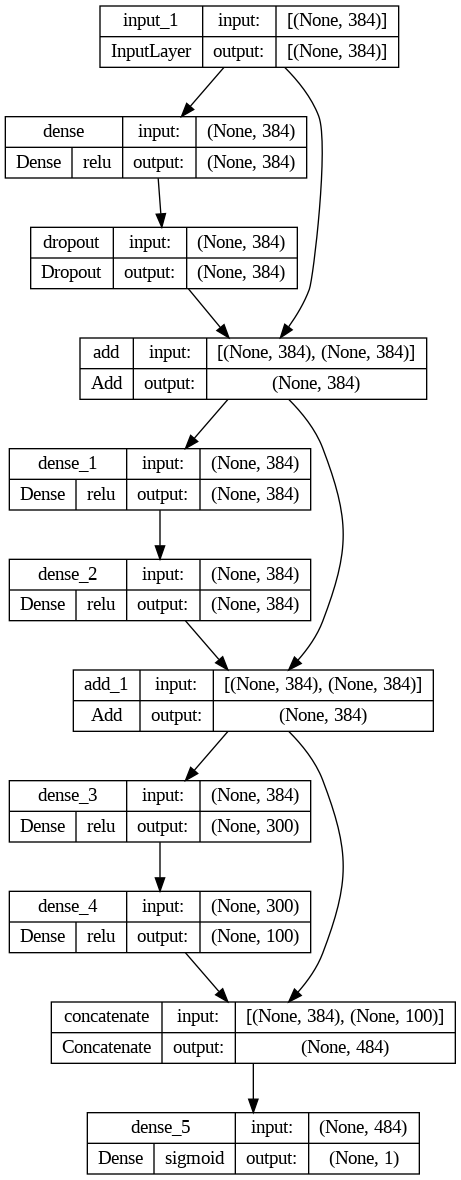

#### Training/validation data graph

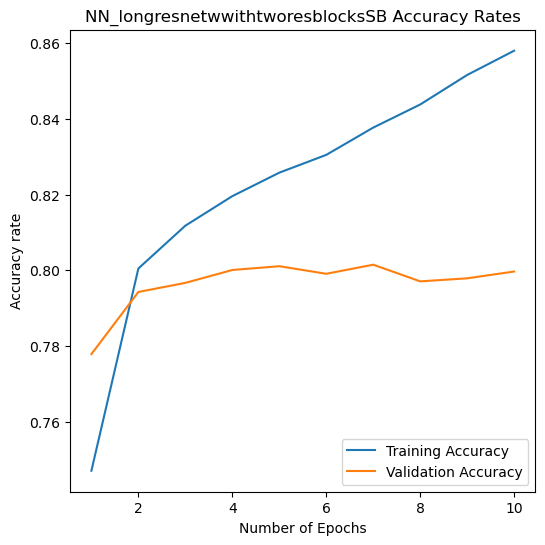

#### Confusion matrix

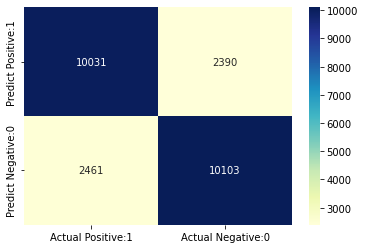

testing error: 0.194156

#### How model performed

This model achieved slightly less error rate than the standard 6 layer model. But what's to our surprise is the overfitting that was occurring in the model. Unlike the last model, instead of gradually contracting the network by reducing the number of neurons layer by layer, we kept them the same number of neurons as our input, thus resulting in more neurons and parameters overall. We think perhaps that's why the model is overfitting. We also observed that the model was learning the training data much better and faster as the training accuracy got as high as 86 percent. 

### 3. three layer nueral networks

#### Model diagram

Like what we did with bag of words, we reduced the number of layers by half to train a model with less complexity and perhaps, less overfitting!

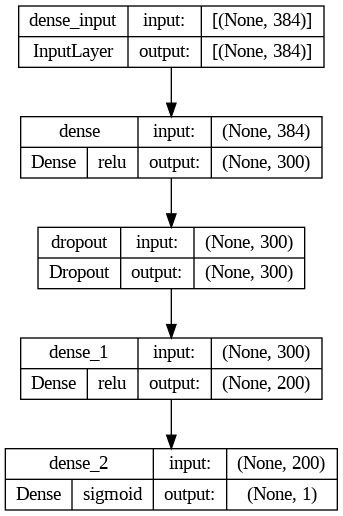

#### Training/validation data graph

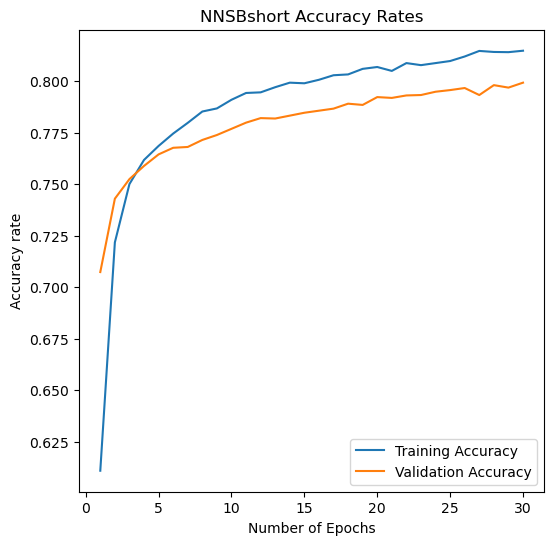

#### Confusion matrix

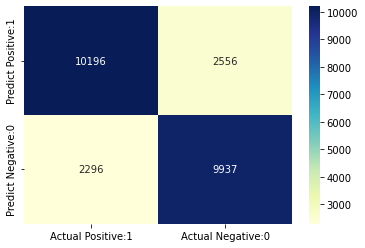

testing error: 0.19437

#### How model performed

While the final validation accuracy for this model was relatively similar to the previous one, we noticed that it took longer to achieve this accuracy rate and increased much slower. However, unlike the previous model which stayed stagnant around 0.80, this model continued to increase its accuracy until it reached our set limit of 30 epochs. The overfitting is also less as we observes a smaller gap between training and validation

### 4. Gradient Boosted Descent Trees (GBDT) Model

The first esemble model we tried was the gradient boosted descent model. We decided train with 1000 trees, limiting the max depth to 8, applying both l1 and l2 regularization and early stopping to prevent overfitting. However, we soon realized that it did not work very well, even after lowering the subsampling of the data. As seen below, the validation accuracy remained stagnant at around 0.75 despite efforts to increase it.

#### Training/validation data graph

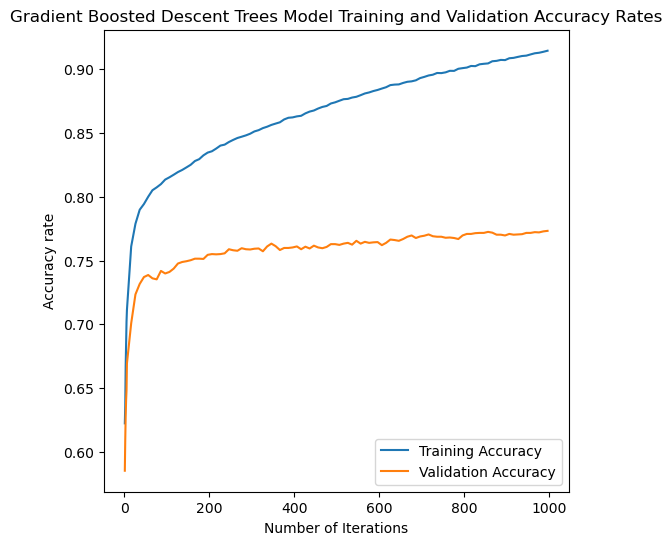

#### Confusion matrix

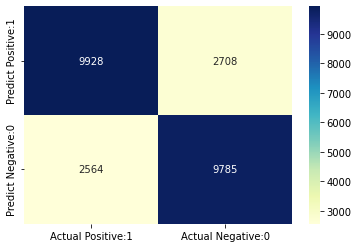

testing error: 0.21100660396237747

#### How model performed

Despite efforts to increase the accuracy by performing changes such as decreasing subsampling of the data, this model performed relatively poor compared to the other models. However, the testing accuracy turns out to be higher about 3 percent, which is probably due to the slight imbalance of classes in the training set or validation set.

### 5. Random Forest Model

just like gradient boosted decision trees, we also trained this one with 1000 trees, the bootstrap size is higher in this one, which is 0.8, we limit max depth to prevent each tree from memorizing too much pattern in the data. Random forests should be an ensemble of many weak learners,so that we don't waste too much time on computing, the trees in the model more diverse and overfitting can be reduced

#### Training/validation data graph

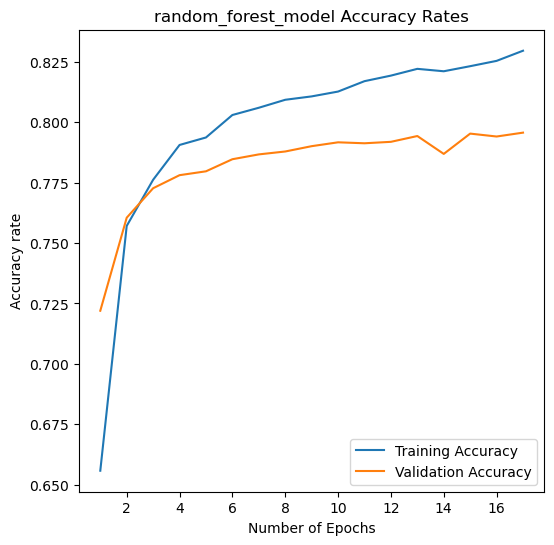

#### Confusion matrix

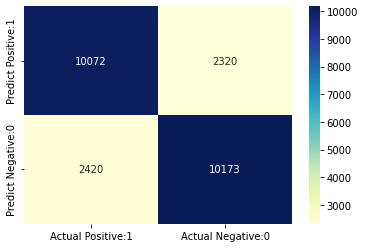

testing error: 0.189714

#### How model performed

Although the accuracy for the random forest model was slightly higher than the gradient boosted descent one, the validation accuracy was less consistent compared to the training accuracy. There's still a noticable gap between training accuracy and validation accuracy. I think if we lower the sub sampling rate just like last one, it can be reduced.

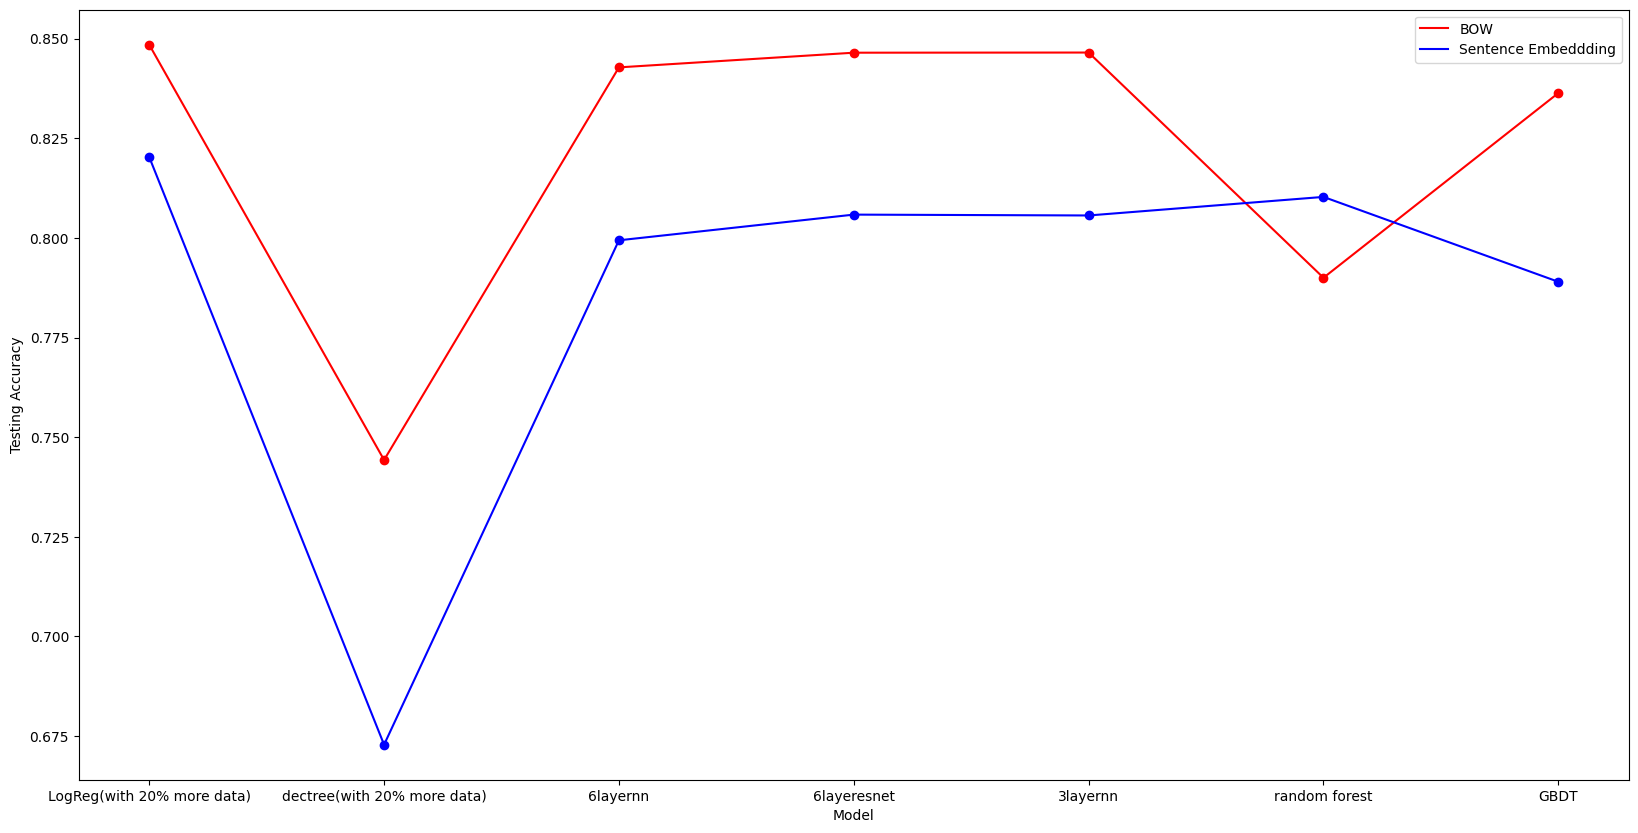

In [28]:
fig, axes = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
x = ['LogReg(with 20% more data)','dectree(with 20% more data)','6layernn','6layeresnet','3layernn','random forest', 'GBDT',]
bow = [1-0.15153091855113066, 1-0.25571342805683406, 1-0.15721432859715834, 1-0.15353211927156296, 1- 0.15349209525715424, 0.79, 1- 0.16365819491695022]
se = [1-0.17971501761127118, 1- 0.32715629377626576, 1-0.2006, 1-0.194156, 1-0.19437, 1- 0.189714, 1- 0.21100660396237747  ]
plt.scatter(x,bow,color = "red")
plt.plot(x, bow, color = "red", label = "BOW")
plt.scatter(x,se, color = "blue")
plt.plot(x,se, color = "blue", label = "Sentence Embeddding")
plt.ylabel("Testing Accuracy")
plt.xlabel("Model")
leg= axes.legend()
plt.show()

# summary

We chose to use logistic regression, decision trees, neural networks, random forests, and gradient boosted decision trees, which were covered in class.  We also decided to train residual neural networks. A residual neural network is an artificial neural network that skips layers in order to retain the gradient, which makes it easier to optimize.

                                                        Training
Throughout the training phase, we experimented with various types of hyperparameters in different models. Some of the hyperparameters we experimented with include learning rate, number of epochs, batch size, and network architecture parameters such as changing the number of layers and number of neurons in each of those layers. When training the models, We had to lower the learning rate from the default 0.01 to 0.00001, because we observed that our models were learning too fast that the validation reached its peak within the first epoch and gradually decrease in validation accuracy afterwards. We applied early stopping to control the total number of epochs so that the models do not overfit.  We also tested and changed the batch size as we are trying to trade off between less overfitting that comes with smaller batches and more robust gradient estimates that come with larger batches. We experimented with different batch sizes initially, and eventually we used 32 for all of our models.. Last but not least, we experimented with different neural network architecture hyperparameters, specifically number of layers and number of neurons in each layer. We created multiple models, some with more or less layers, and also altered the number of neurons from between 300 to 500. For optimizers we choose adam given its per-parameter adaptive learning rate, which generally converges to better parameters than sgd and better suited for non-convex problems such as deep learning.

                                                        Mistakes
We made some mistakes along the way. One mistake we made is accidentally storing labels as floats instead of ints for our bag of words models. Therefore we had to convert our labels back to int every we load our data. Another mistake we made was that we accidentally inverted our training-validation split. We used 80% of our data for validation and 20% of our data for training, which made our error rates different than what we were expecting. This was an easy fix as all we had to do was change how we split up the data. We also made a mistake fitting the training text and testing text separately for our vectorizer(counting word frequency and extracts the 500 most frequent words as our data), which resulted in a much higher training error than validation error. Training and testing data should use the same set of features (same words for frequency). 

                                                    MODEL evaluation
First thing that’s very easy to notice is that the bag of words models virtually outperformed all of sentence embedding models with one exception, even for the deep learning ones to our surprise. After some researching, we learned that the sentence transformer is trained on a very large corpus of text for more general tasks, which is not very specific to our task: to discern a complimenting movie comment from a criticizing one. What we actually needed to do to improve the models performance is to fine-tune the sentence-transformer network with our data before we use it to generate sentence embeddings. We could do that by taking an existing word-embedding model that takes into contextual information and a pooling model that does some average over the word-embedding model and pass both of them into the constructor of sentence transformer and training it with our data. 
Second of all, we can see that both decision trees failed miserably compared to other model. We think it’s due to the lack of complexity and its discrete nature that the model just could not learn the pattern correctly. 
Both of our ensemble methods did not do as well as deep learning models, but gradient boosted decision trees gave us insights on what features are truly important so that maybe next time we can train with those more important features and reduce the input size so that the models will be less affected by less relevant features, which soundings like doing principle component analysis.
 While there are numerous reasons for why some training models perform better or worse than others, some of the main reasons include choosing an appropriate model complexity, tuning the hyperparameters, and determining the model's architecture. Selecting a model that has a reasonable complexity is important to ensure that it does not overfit nor underfit the data. Similarly, tuning the hyperparameters and determining what to set each parameter to are important steps in regulating the model and improving its performance. Lastly, determining the model's architecture such as the number of layers and type of each layer are important to ensure the model performs well on the given dataset.
 
                                                    Tasks division
For our project, we divided the necessary tasks based on each person's strengths and understanding of the different aspects of machine learning. After deciding to perform our project on the IMDB dataset, Dean (Yiqun du)organized and preprocessed the data using a bag of words and sentence embedding. He also wrote the base code for all the training models, and trained them using the bag of words. Using the base code, Kaylie trained the models using the sentence embedding dataset, as well as experimented with the hyperparameters to try and find the best-performing models. After training, Dean, Michael, and Kaylie analyzed the data by illustrating each model, plotting the validation and training data on different graphs, and showing the confusion matrix for each model for both the bag of words and sentence embedding. 
